Project completed on 2023-08-02 by Aliaksandr Naumkin

# Flight Price Prediction

Dataset contains information about flight booking options for flight travel between India's top 6 metro cities.

## Aim

According to the specified values of the dataset, it is necessary to train a model that will predict the cost of plane tickets.

## Dataset discription

The dataset has 300153 rows and 11 features.
The various features of the dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

### **Contents:**
- [Initialization](#initialization)
- [Data understanding](#data-understanding)
- [Data cleaning](#data-cleaning)
- [Feature engineering](#feature-engineering)
- [Modeling](#modeling)
- [Evaluation](#evaluation)
- [Improvement](#improvement)
- [Conclusion](#conclusion)

### Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector


Code assumes the dataset is in the same folder as the .ipynb file

Loading the dataset from csv file

In [2]:
data = pd.read_csv('flight_price_Dataset.csv', index_col=0)

data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Data understanding

Checking data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


*Here we can see 3 types of data: object, int and float. By the way we can admit, that here no null values*

Checking categorical values for typos and incorrect names

In [4]:
for cat_column in data.select_dtypes(exclude=['Int64', 'Float64']):
    print('\n')
    print(data[cat_column].value_counts())



airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64


des

*Categorical features don't have incorrect values*

Checking numerical values for outliers

In [5]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


*All the features look good and credible.*

### Data cleaning

Make sure we dont have null-values

In [6]:
data.columns[data.any().isna()].to_list()

[]

Check rows for duplicates

In [7]:
data[data.duplicated() == True]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


*Don't have duplicates*

### Feature engineering

Conversion categorical features into numerical

In [8]:
#creating list of features with 'object' data type
cat_data = data[['arrival_time','departure_time', 'destination_city', 'source_city', 'airline', 'stops']]

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(cat_data)
ohe_data = ohe.transform(cat_data)
data[ohe.get_feature_names_out()] = ohe_data
data.drop(cat_data.columns, axis=1, inplace=True)

changing target feature into numerical

In [9]:
data['class'].replace({'Business': 1, 'Economy': 0}, inplace=True)

Drop unnecessary/duplicated features

In [10]:
data.drop('flight', axis=1, inplace=True)

For making weight of features not depended from scale, need to scale it.

In [11]:
data_std = data.copy()

#creating list af numerical features names
numerical_data = data_std[['duration', 'days_left']]

Std = StandardScaler()
std_scaled_data = Std.fit_transform(numerical_data)
data_std[numerical_data.columns] = std_scaled_data
del std_scaled_data

data_std

,class,duration,days_left,price,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,...,source_city_Mumbai,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,stops_one,stops_two_or_more,stops_zero
0,0,-1.397531,-1.843875,5953,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,-1.375284,-1.843875,5953,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,-1.397531,-1.843875,5956,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,-1.386407,-1.843875,5955,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,-1.375284,-1.843875,5955,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,-0.297695,1.695692,69265,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
300149,1,-0.250421,1.695692,77105,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
300150,1,0.223718,1.695692,79099,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
300151,1,-0.308819,1.695692,81585,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Modeling

The choice of the best model ultimately depends on factors such as the size of our dataset, the complexity of the relationship between features and the target variable, interpretability requirements, and computational resources available.

For our task I'm choosing Linear Regression

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_std.drop('price',axis=1), data_std['price'], train_size=0.8, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg_predict = lin_reg.predict(x_test)

As result, our model can predict values lower than zero. For our task such prediction is totally incorrect. To avoid this, I will replace all values which are lower than minimal price ticket, with minimal price ticket for all our dataset.

In [13]:
lin_reg_predict = [data.price.min() if i < data.price.min() else i for i in lin_reg_predict ]

### Evaluation

As correlation analysis, I wanna see which features have biggest correlation with our target feature

In [14]:
data.corr()['price'].sort_values(ascending=False).drop('price')

class                           0.937860
airline_Vistara                 0.360816
duration                        0.204222
stops_one                       0.199913
airline_Air_India               0.070041
arrival_time_Evening            0.056408
departure_time_Night            0.041768
arrival_time_Morning            0.030379
destination_city_Kolkata        0.020956
arrival_time_Night              0.020344
source_city_Chennai             0.018742
destination_city_Chennai        0.018473
departure_time_Morning          0.018199
source_city_Kolkata             0.016127
destination_city_Bangalore      0.014050
source_city_Mumbai              0.013206
source_city_Bangalore           0.011702
destination_city_Mumbai         0.010533
departure_time_Evening          0.007946
destination_city_Hyderabad     -0.008292
departure_time_Early_Morning   -0.012232
source_city_Hyderabad          -0.012828
departure_time_Late_Night      -0.033768
arrival_time_Afternoon         -0.040258
source_city_Delh

And we can check which features have the biggetst impact for our model

In [15]:
lin_reg_coef = dict(zip(data_std.drop('price', axis=1).columns, lin_reg.coef_))
dict(sorted(lin_reg_coef.items(), key=lambda item: item[1]))

{'stops_zero': -6.039930815088532e+16,
 'stops_one': -6.03993081508777e+16,
 'stops_two_or_more': -6.039930815087543e+16,
 'arrival_time_Early_Morning': -1.2563864850793158e+16,
 'arrival_time_Afternoon': -1.2563864850792358e+16,
 'arrival_time_Morning': -1.256386485079186e+16,
 'arrival_time_Evening': -1.256386485079139e+16,
 'arrival_time_Late_Night': -1.2563864850791338e+16,
 'arrival_time_Night': -1.256386485079122e+16,
 'source_city_Hyderabad': -6342863199320149.0,
 'source_city_Delhi': -6342863199319870.0,
 'source_city_Mumbai': -6342863199318668.0,
 'source_city_Chennai': -6342863199318589.0,
 'source_city_Bangalore': -6342863199318463.0,
 'source_city_Kolkata': -6342863199316897.0,
 'airline_AirAsia': -374553331257669.2,
 'airline_Air_India': -374553331257538.5,
 'airline_GO_FIRST': -374553331255959.94,
 'airline_Indigo': -374553331255519.8,
 'airline_SpiceJet': -374553331255349.5,
 'airline_Vistara': -374553331253587.3,
 'days_left': -1771.704583850463,
 'duration': 281.511556

*As a result, we can see that our model has a different correlation compared to the pandas library*

For better understanding I will visualize small sample comparison of test values annd predicted values

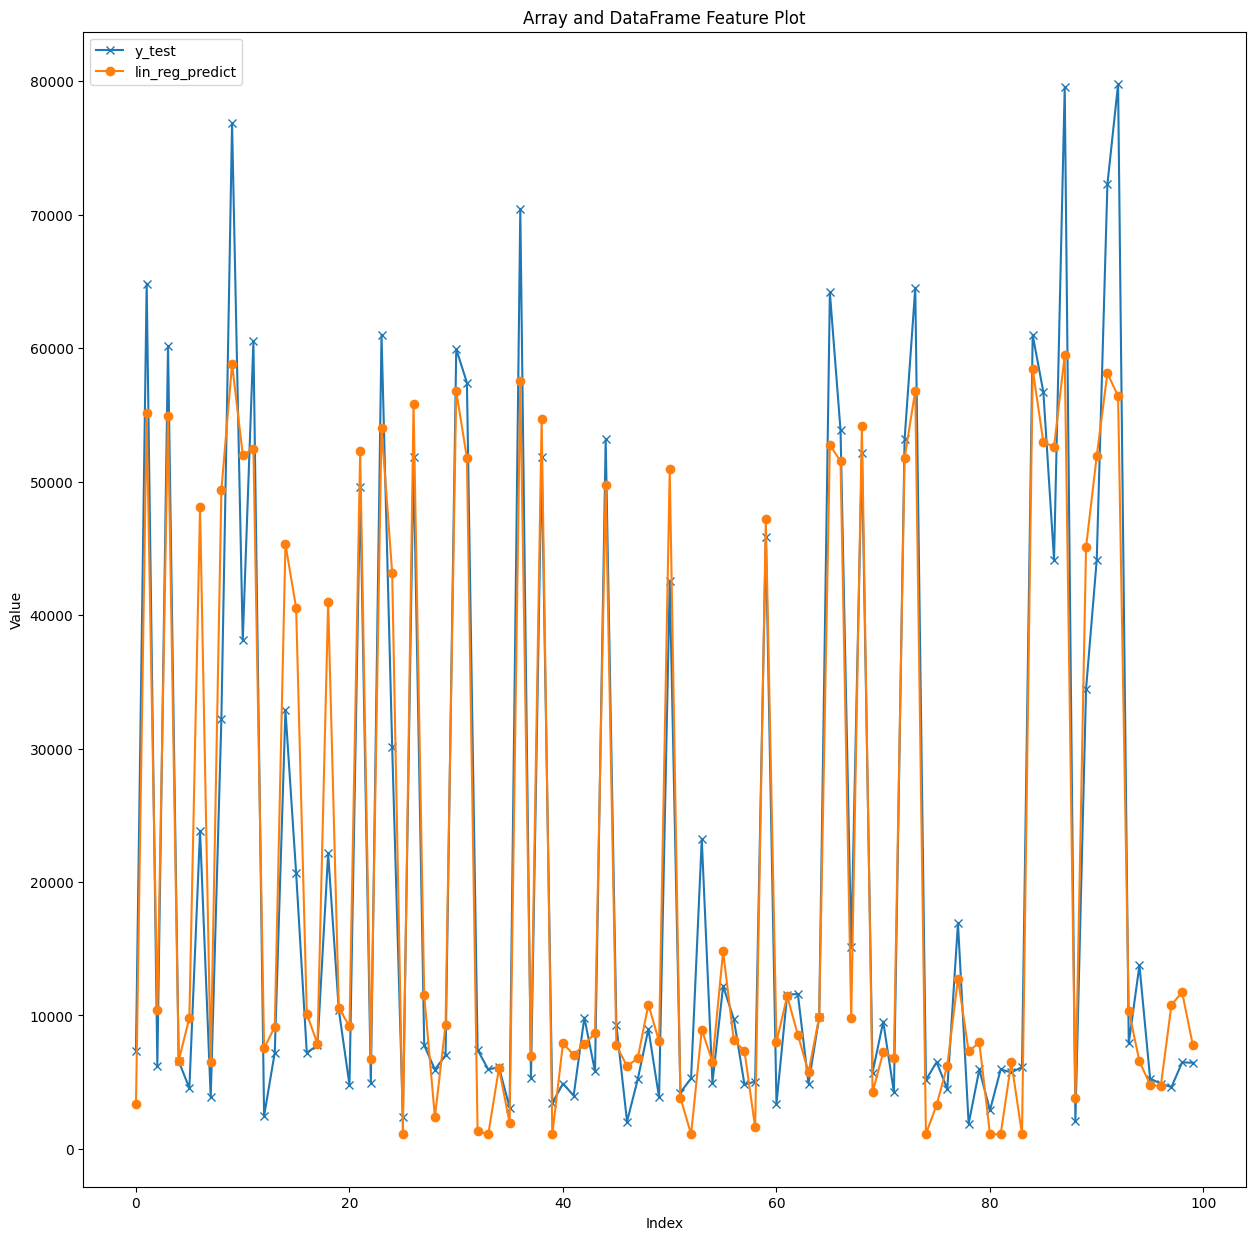

In [16]:
# Optional: Set the size of the plot
plt.figure(figsize=(15, 15))

# Plot the DataFrame feature
plt.plot(range(len(y_test))[:100], y_test[:100], label='y_test', marker='x')

# Plot the array
plt.plot(range(len(lin_reg_predict))[:100], lin_reg_predict[:100], label='lin_reg_predict', marker='o')

# Set the x-axis ticks and labels

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Array and DataFrame Feature Plot')
plt.legend()

# Show the plot
plt.show()

To make it more readable, let's sort it

In [17]:
#Created sorted dataFrame
visual_data = pd.DataFrame({'test_sample': y_test[:100], 
                            'predict_sample': lin_reg_predict[:100]})

visual_data.sort_values('test_sample', inplace=True)
visual_data.insert(0, 'index', np.arange(100))
visual_data.set_index('index')

,test_sample,predict_sample
index,,
0,1890,7312.0
1,2056,6192.0
2,2098,3792.0
3,2410,1105.0
4,2477,7536.0
...,...,...
95,70431,57568.0
96,72268,58112.0
97,76841,58800.0


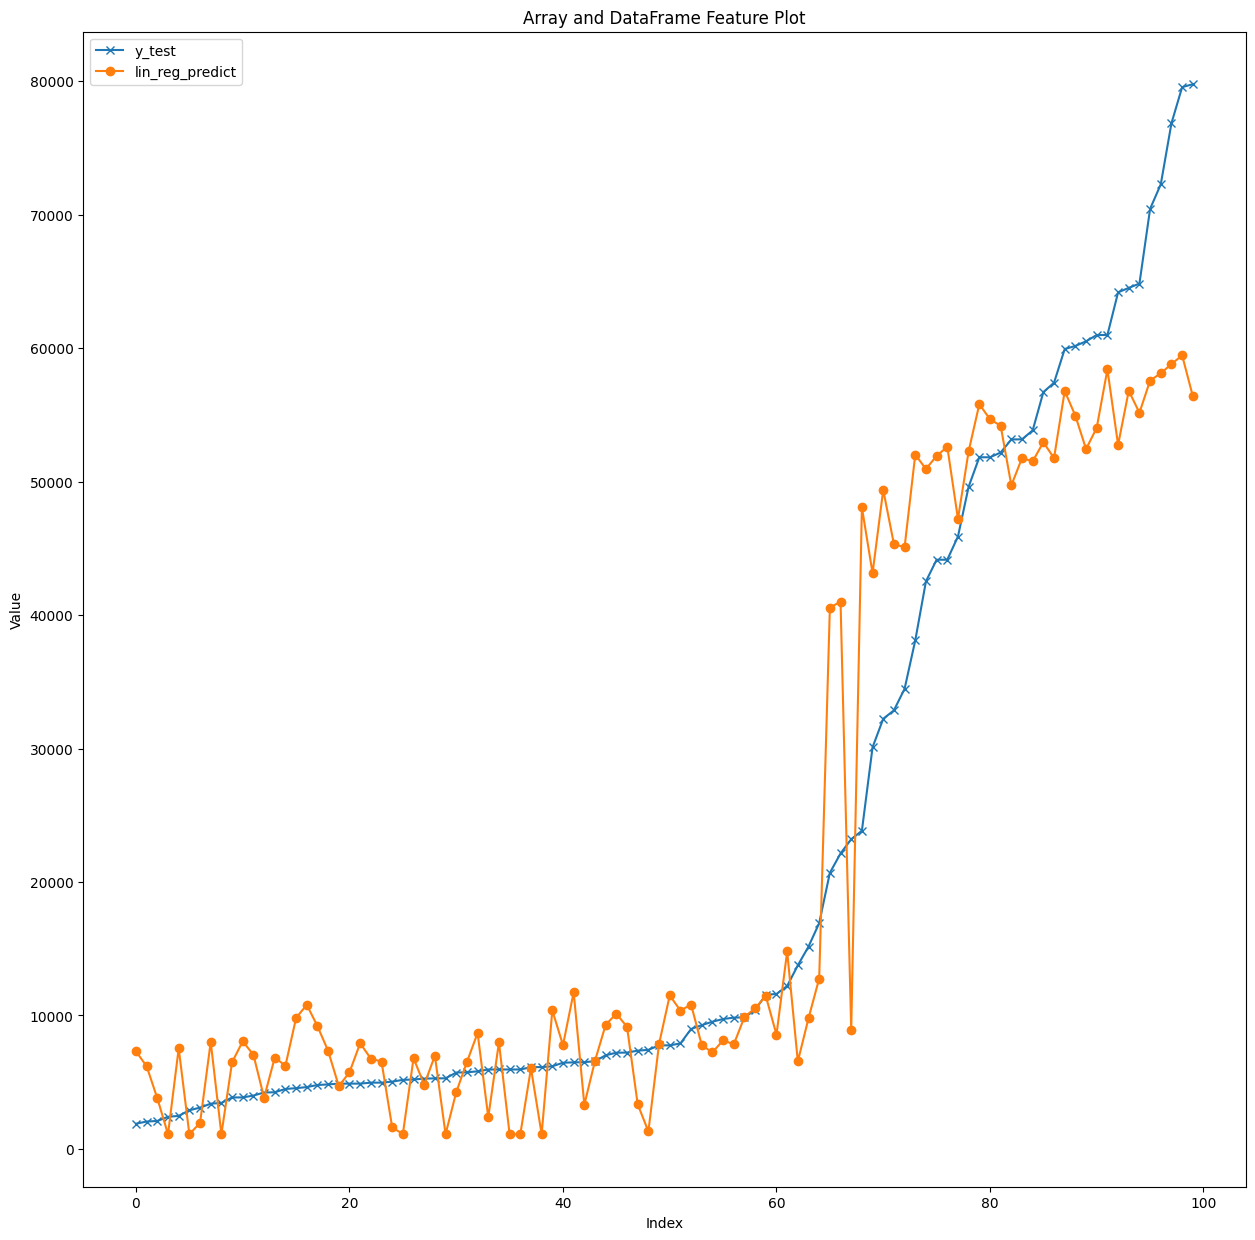

In [18]:
plt.figure(figsize=(15, 15))

plt.plot(visual_data['index'], visual_data['test_sample'], label='y_test', marker='x')

plt.plot(visual_data['index'], visual_data['predict_sample'], label='lin_reg_predict', marker='o')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Array and DataFrame Feature Plot')
plt.legend()

plt.show()

*The result seems like is not the best, but it's not random*

For evaluating my model in better way, I selected such metrics:

The RMSE represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. It serves to aggregate the magnitudes of the errors in predictions for various data points into a single measure of predictive power.

The formula for Mean Square Error is as follows:

RMSE = √((1/n) * Σ(yᵢ - ŷᵢ)²)

In [19]:
mean_squared_error(y_test, lin_reg_predict, squared=False)

6635.095102396105

Mean Absolute Error (MAE) is a metric used to measure the accuracy of a predictive model. It calculates the average absolute difference between the actual values and the predicted values generated by the model.

MAE = (1/n) * Σ|actual_i - predicted_i|

In [20]:
mean_absolute_error(y_test, lin_reg_predict)

4342.968766137496

The R-squared (R²) score, also known as the coefficient of determination, is a statistical measure which indicates the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) used in the model.

The R-squared score best possible is 1.0 and it can be negative

In [21]:
r2_score(y_test, lin_reg_predict)

0.9145955365001339

### Improvement

Here I'll try to improve accuracy for my model with SequentialFeatureSelector()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data_std.drop('price',axis=1), data_std['price'], train_size=0.8, random_state=42)

sfs = SequentialFeatureSelector(LinearRegression(), k_features = (1, len(data_std.columns)-1), scoring = 'r2').fit(x_train, y_train)
features = []
[features.append(data_std.drop('price', axis=1).columns[i]) for i in sfs.k_feature_idx_]

print(f'best score: {sfs.k_score_}')

best score: 0.9114722599932092


In [23]:
features

['class',
 'duration',
 'days_left',
 'arrival_time_Afternoon',
 'arrival_time_Early_Morning',
 'arrival_time_Late_Night',
 'arrival_time_Morning',
 'arrival_time_Night',
 'departure_time_Afternoon',
 'departure_time_Evening',
 'departure_time_Late_Night',
 'departure_time_Morning',
 'departure_time_Night',
 'destination_city_Chennai',
 'destination_city_Delhi',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'source_city_Bangalore',
 'source_city_Chennai',
 'source_city_Delhi',
 'source_city_Hyderabad',
 'source_city_Kolkata',
 'source_city_Mumbai',
 'airline_AirAsia',
 'airline_Air_India',
 'airline_GO_FIRST',
 'airline_Indigo',
 'airline_Vistara',
 'stops_one',
 'stops_two_or_more',
 'stops_zero']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data['price'], train_size=0.8, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg_predict = lin_reg.predict(x_test)

r2_score(y_test, lin_reg_predict)

0.9113049346916603

*The result is worse, than for model with all features*

### Conclusion

According R-squared, Linear regression as flight price predictor have good accuracy withouut any tuning. But MAE and RMSE is still pretty big. It can be cuased by be standard deviation of dataset and need to try to work with outliers of dataset, to improve performance.